# Lab 4: Linear Regression

### We have select a housing dataset where 'House Area' (in Sq. feet) in the independent/Input variable (X) and 'House Price' is the dependent/Target variable (y)

### Import required packages

In [24]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , roc_curve , auc
import matplotlib.pylab as plt
from dmba import regressionSummary , classificationSummary
from dmba import liftChart , gainsChart

In [23]:
#Reading Housing dataset
Housing_df = pd.read_csv('Housing_data_Lab4.csv')
#Housing_df['price'] = Housing_df['price'].astype(float)
#Housing_df['area'] = Housing_df['area'].astype(float)

Housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
#Shape of the dataset
Housing_df.shape

(545, 13)

In [25]:
Housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
#Checking the dtypes of all the columns

Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Partition

In [29]:
Housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [30]:
# Partition data into predictors (x) and output (y)

predictors = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
              'airconditioning','parking', 'prefarea', 'furnishingstatus']
outcome = 'price'

# Partition data into predictors (x) and output (y)
X = pd.get_dummies(Housing_df[predictors], drop_first=True)
y = Housing_df[outcome]

X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [31]:
# Split the data into training and validation
train_X, valid_X , train_y , valid_y = train_test_split (X, y, test_size = 0.4 , random_state = 1)

In [32]:
train_X.shape

(327, 13)

### Regression Model Code

In [33]:
# Built the Linear Model based on the training data
housing_lm = LinearRegression()
housing_lm.fit(train_X , train_y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': housing_lm.coef_}))

# print performance measures (training data)
regressionSummary(train_y , housing_lm.predict(train_X))

                          Predictor    coefficient
0                              area     243.036960
1                          bedrooms   40181.995186
2                         bathrooms  993868.942822
3                           stories  549650.180753
4                           parking  241282.347857
5                      mainroad_yes  507283.601535
6                     guestroom_yes  245572.331267
7                      basement_yes  588859.757202
8               hotwaterheating_yes  978048.363237
9               airconditioning_yes  628328.957073
10                     prefarea_yes  661405.573099
11  furnishingstatus_semi-furnished -119527.312553
12     furnishingstatus_unfurnished -416850.736202

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1002986.3310
            Mean Absolute Error (MAE) : 740494.7568
          Mean Percentage Error (MPE) : -3.7792
Mean Absolute Percentage Error (MAPE) : 16.5187


### Fitting a Regression Model Code

In [34]:
# Use predict() to make predictions on a new set

housing_lm_pred = housing_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': housing_lm_pred , 'Actual': valid_y , 'Residual': valid_y - housing_lm_pred})
print(result.head(10))

#printperformace measures (validation data)
regressionSummary(valid_y , housing_lm.predict(valid_X))

        Predicted   Actual      Residual
62   6.179898e+06  7070000  8.901018e+05
247  6.247674e+06  4550000 -1.697674e+06
142  6.467379e+06  5600000 -8.673794e+05
107  5.703047e+06  6125000  4.219526e+05
483  4.247847e+06  2940000 -1.307847e+06
351  2.925259e+06  3780000  8.547411e+05
516  2.520013e+06  2450000 -7.001322e+04
47   7.476611e+06  7490000  1.338882e+04
481  2.318769e+06  2940000  6.212307e+05
90   4.483672e+06  6440000  1.956328e+06

Regression statistics

                      Mean Error (ME) : 51916.9521
       Root Mean Squared Error (RMSE) : 1155646.9157
            Mean Absolute Error (MAE) : 829498.9852
          Mean Percentage Error (MPE) : -3.4861
Mean Absolute Percentage Error (MAPE) : 18.4080


### Validation Performance
#### Predictive accuracy measures and charts of prediction error distribution

0.8348623853211009


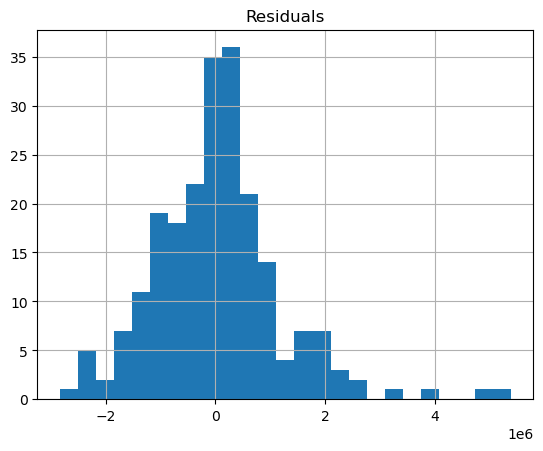

In [38]:
# Validation Error-Evaluate Perfomance

housing_lm_pred = housing_lm.predict(valid_X)

all_residuals = valid_y - housing_lm_pred

#Determine the percentage of datapoint with a residual in [-1500000, 1500000] = approx. 83%

print(len(all_residuals[(all_residuals > -1500000) & ( all_residuals < 1500000)]) / len(all_residuals))

pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

### Exhaustive Search Code

In [41]:
def train_model(variables): 
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results: 
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC} 
    d.update({var: var in result['variables'] for var in allVariables}) 
    data.append(d)

pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))


NameError: name 'exhaustive_search' is not defined

### Popular Subset Selection Algorithms

#### Backward Elimination Code

In [42]:
def train_model(variables):
    model = LinearRegression() 
    model.fit(train_X[list(variables)], train_y) 
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
score_model, verbose=True) 

print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


NameError: name 'backward_elimination' is not defined

#### Forward Elimination Code

In [44]:
# The initial model is the constatn model - this requires special handling # in train_model and score_model

def train_model(variables): 
    if len(variables) == 0:
        return None

    model = LinearRegression() 
    model.fit(train_X[list(variables)], train_y) 
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True) 
print(best_variables)


NameError: name 'forward_selection' is not defined

#### Stepwise Code

In [45]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model,verbose=True) 
print(best_variables)

NameError: name 'stepwise_selection' is not defined